In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\train.csv
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\export.pkl
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0024cdab0c1e.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\00cb6555d108.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0124dffecf29.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\01b3aed3ed4c.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0369f3efe69b.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_

In [3]:
import glob
from pathlib import Path
import os.path

image_dir = Path('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset/gaussian_filtered_images/gaussian_filtered_images')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)
#print(image_df)
#print(type(image_df))

,Filepath,Label
0,C:\Users\sm160\OneDrive - Amity University\Des...,Severe
1,C:\Users\sm160\OneDrive - Amity University\Des...,No_DR
2,C:\Users\sm160\OneDrive - Amity University\Des...,Moderate
3,C:\Users\sm160\OneDrive - Amity University\Des...,No_DR
4,C:\Users\sm160\OneDrive - Amity University\Des...,No_DR


In [4]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=False, random_state=1)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_dataframe(
                                         dataframe=train_df,
   										 x_col='Filepath',
       									 y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode = 'categorical',
                                         subset = 'training')
valid_data = datagen.flow_from_dataframe(
                                         dataframe=train_df,
    									 x_col='Filepath',
      									 y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode = 'categorical',
                                         subset = 'validation')
test_data = test_datagen.flow_from_dataframe(
                                             dataframe=test_df,
    										 x_col='Filepath',
        									 y_col='Label',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = 'categorical')

Found 2636 validated image filenames belonging to 5 classes.
Found 659 validated image filenames belonging to 5 classes.
Found 367 validated image filenames belonging to 5 classes.


In [6]:
import efficientnet.tfkeras as efn

In [7]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [8]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [11]:
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=50,verbose=1)

C:\Users\sm160\AppData\Local\Temp\ipykernel_6580\2073265177.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=50,verbose=1)


Epoch 1/50
83/83 [==============================] - 335s 4s/step - loss: 1.0359 - acc: 0.6426 - val_loss: 1.1481 - val_acc: 0.6039 - lr: 1.0000e-04
Epoch 2/50
83/83 [==============================] - 289s 3s/step - loss: 0.7533 - acc: 0.7227 - val_loss: 1.0189 - val_acc: 0.6328 - lr: 1.0000e-04
Epoch 3/50
83/83 [==============================] - 289s 3s/step - loss: 0.6937 - acc: 0.7557 - val_loss: 0.8755 - val_acc: 0.6646 - lr: 1.0000e-04
Epoch 4/50
83/83 [==============================] - 293s 4s/step - loss: 0.5905 - acc: 0.7834 - val_loss: 0.7529 - val_acc: 0.6874 - lr: 1.0000e-04
Epoch 5/50
83/83 [==============================] - 295s 4s/step - loss: 0.5794 - acc: 0.7876 - val_loss: 0.6726 - val_acc: 0.7678 - lr: 1.0000e-04
Epoch 6/50
83/83 [==============================] - 294s 4s/step - loss: 0.5284 - acc: 0.8027 - val_loss: 0.5701 - val_acc: 0.7785 - lr: 1.0000e-04
Epoch 7/50
83/83 [==============================] - 294s 4s/step - loss: 0.4873 - acc: 0.8153 - val_loss: 0.6410

In [9]:
results = model.evaluate(valid_data, verbose=0)

In [13]:
#misc testing 
print(len(test_data))
print(test_data.n)
print(float(test_data.n//test_data.batch_size)) 
print(55505/32)
print(55488/32)

12
367
11.0
1734.53125
1734.0


In [10]:
#STEP_SIZE_TEST=test_data.n//test_data.batch_size ------> ye 11 aa rha tha
test_data.reset()
pred=model.predict_generator(test_data,
#steps=STEP_SIZE_TEST,
steps=12,
verbose=1)

C:\Users\sm160\AppData\Local\Temp\ipykernel_14324\370894413.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_data,


12/12 [==============================] - 12s 763ms/step


In [15]:
print(test_df)
print('------------')
print(len(pred))

                                               Filepath           Label
3295  C:\Users\sm160\OneDrive - Amity University\Des...          Severe
3296  C:\Users\sm160\OneDrive - Amity University\Des...           No_DR
3297  C:\Users\sm160\OneDrive - Amity University\Des...            Mild
3298  C:\Users\sm160\OneDrive - Amity University\Des...        Moderate
3299  C:\Users\sm160\OneDrive - Amity University\Des...           No_DR
...                                                 ...             ...
3657  C:\Users\sm160\OneDrive - Amity University\Des...           No_DR
3658  C:\Users\sm160\OneDrive - Amity University\Des...  Proliferate_DR
3659  C:\Users\sm160\OneDrive - Amity University\Des...           No_DR
3660  C:\Users\sm160\OneDrive - Amity University\Des...          Severe
3661  C:\Users\sm160\OneDrive - Amity University\Des...            Mild

[367 rows x 2 columns]
------------
367


In [16]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices.size)
print(predicted_class_indices)

367
[2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 1 1 2 2 2 0 2 1 1 0 2 2 2 2 1 1 1 1 2 1 1 1
 2 2 2 2 4 2 2 0 1 1 1 2 4 2 1 2 1 2 2 1 2 0 1 3 2 2 1 2 2 1 2 1 2 1 1 4 2
 2 2 2 2 2 2 0 1 1 3 2 3 2 3 3 1 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 1 2 0 2 1 2
 2 2 3 1 0 2 1 1 1 2 2 2 1 1 2 1 2 3 2 2 1 0 2 2 2 1 2 2 2 0 2 1 2 1 3 2 1
 1 2 1 2 2 1 2 1 2 3 2 2 2 1 2 2 2 0 4 1 2 2 1 2 1 1 1 2 0 4 1 2 1 2 2 1 2
 2 0 2 2 2 1 2 1 2 2 2 3 2 2 2 2 2 2 1 2 2 3 2 1 2 2 1 1 1 1 1 1 2 0 1 2 2
 0 2 2 1 1 2 2 2 0 1 2 1 2 2 2 1 0 2 2 4 2 1 1 2 1 1 2 2 2 2 1 2 2 1 2 1 0
 2 2 4 1 1 1 3 0 2 0 1 2 2 2 1 0 1 0 1 2 2 2 1 2 2 2 2 3 2 1 2 1 2 2 1 2 0
 2 2 3 2 2 2 1 1 0 2 1 1 1 2 4 1 2 2 2 1 2 1 0 3 3 1 2 0 1 2 3 2 2 2 2 1 2
 0 2 1 4 2 4 1 2 2 2 2 2 0 0 3 2 2 2 1 0 2 2 2 1 1 2 2 1 2 3 1 1 0 1]


In [57]:
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_class_indices = [labels[k] for k in predicted_class_indices]
print(len(predicted_class_indices))
print(predicted_class_indices)

367
['No_DR', 'Moderate', 'Moderate', 'No_DR', 'Moderate', 'No_DR', 'Moderate', 'Moderate', 'No_DR', 'Moderate', 'No_DR', 'Moderate', 'Moderate', 'No_DR', 'No_DR', 'Moderate', 'Moderate', 'No_DR', 'No_DR', 'No_DR', 'Mild', 'No_DR', 'Moderate', 'Moderate', 'Mild', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'No_DR', 'Moderate', 'Moderate', 'Moderate', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'Severe', 'No_DR', 'No_DR', 'Mild', 'Moderate', 'Moderate', 'Moderate', 'No_DR', 'Severe', 'No_DR', 'Moderate', 'No_DR', 'Moderate', 'No_DR', 'No_DR', 'Moderate', 'No_DR', 'Mild', 'Moderate', 'Proliferate_DR', 'No_DR', 'No_DR', 'Moderate', 'No_DR', 'No_DR', 'Moderate', 'No_DR', 'Moderate', 'No_DR', 'Moderate', 'Moderate', 'Severe', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'Mild', 'Moderate', 'Moderate', 'Proliferate_DR', 'No_DR', 'Proliferate_DR', 'No_DR', 'Proliferate_DR', 'Proliferate_DR', 'Moderate', 'No_DR', 'No_DR', 'No_DR', 'No_DR', 'No_

In [58]:
# Display the result
#print(f'The first 5 predictions: {predictions[:5]}')
print(f'The first 5 predictions: {predicted_class_indices[:5]}')

The first 5 predictions: ['No_DR', 'Moderate', 'Moderate', 'No_DR', 'Moderate']


In [59]:
llist = test_df["Label"].tolist()
print(len(llist))

367


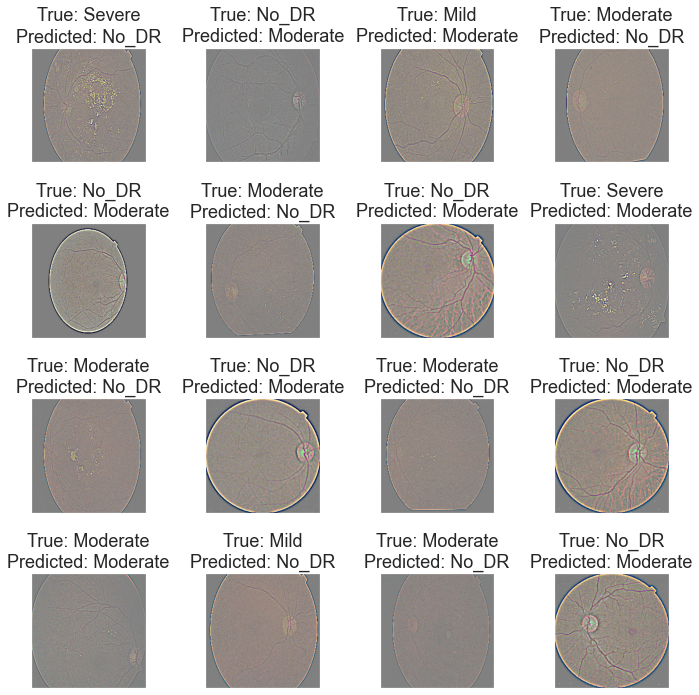

In [36]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {predictions[i]}")
plt.tight_layout()
plt.show()

In [40]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [47]:
#import matplotlib.pyplot as plt
sheet1=pd.DataFrame(history.history)[['acc','val_acc']]
acc_sheet=sheet1*100
#with pd.ExcelWriter('C:/Users/sm160/OneDrive - Amity University/Desktop/output2.xlsx') as writer:  
#    acc_sheet.to_excel(writer, sheet_name='Sheet1')
print(acc_sheet)

          acc    val_acc
0   64.264035  60.394537
1   72.268587  63.277692
2   75.569046  66.464341
3   78.338391  68.740517
4   78.755689  76.783007
5   80.273139  77.845222
6   81.525040  76.631260
7   83.308041  78.603947
8   83.915025  77.693474
9   84.825492  77.389985
10  77.314115  63.732928
11  77.617604  67.830044
12  77.276176  77.541733
13  78.679818  75.417298
14  82.549316  77.996963
15  83.801216  73.899847
16  85.128981  78.300458
17  88.884676  81.790590
18  90.136570  81.638849
19  90.781486  79.969651
20  90.553868  81.487101
21  92.374808  81.183612
22  93.171471  80.273139
23  93.399090  81.335354
24  93.474960  80.576628
25  94.081944  78.148711
26  94.764793  81.335354
27  95.030349  82.397574
28  95.182097  78.452200
29  96.320182  81.335354
30  95.978755  81.638849
31  96.433991  82.549316
32  95.978755  81.942338
33  96.509862  81.183612
34  96.206373  80.880123
35  96.661609  79.666162
36  97.116846  79.210925
37  97.268587  82.094079
38  97.685885  82.094079


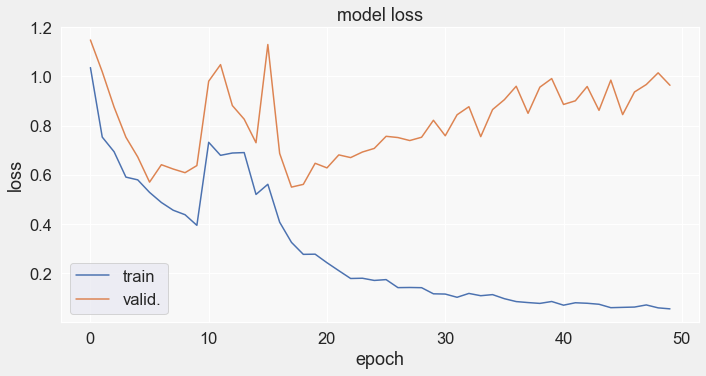

In [48]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)

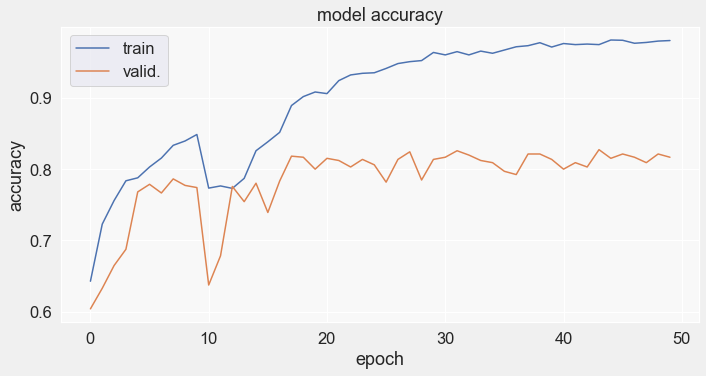

In [51]:
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 211)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

[[114, 2, 5, 6, 0], [0, 80, 3, 0, 2], [3, 6, 52, 7, 3], [0, 11, 3, 58, 0], [0, 1, 0, 4, 7]]


<Figure size 1080x720 with 0 Axes>

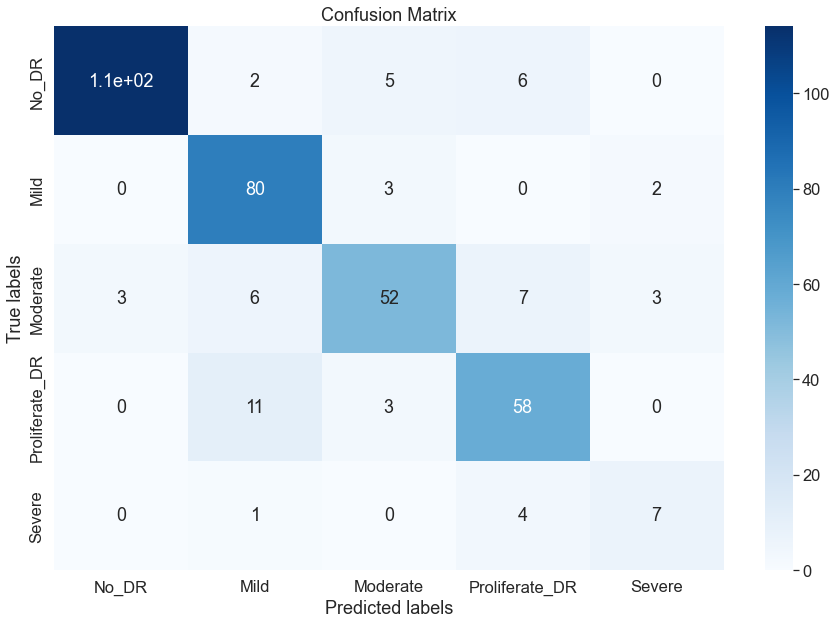

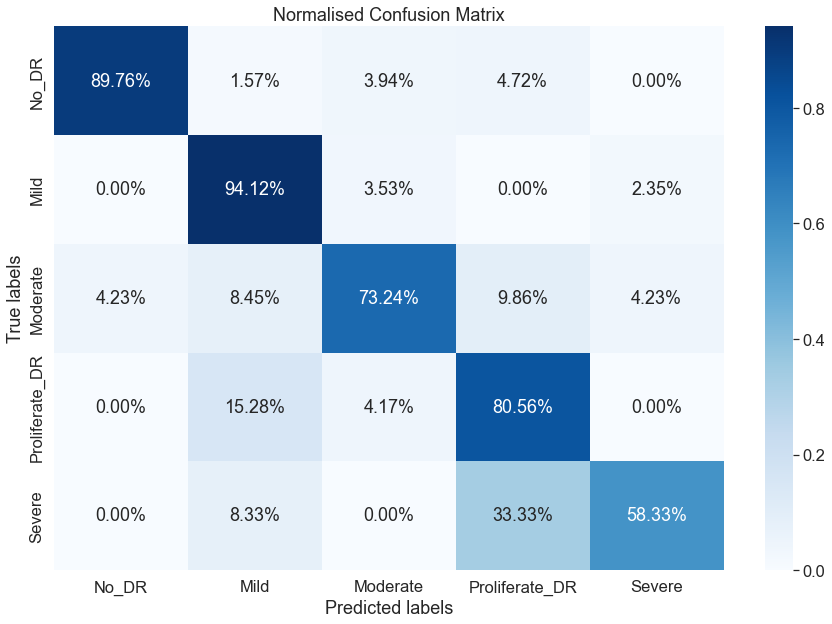

In [4]:
#EFFICIENTNET
# sns.heatmap(cm, annot=True,cmap="Blues",ax=ax)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

cm=[[114,2,5,6,0],[0,80,3,0,2],[3,6,52,7,3],[0,11,3,58,0],[0,1,0,4,7]]
print(cm)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap="Blues",ax=ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["No_DR", "Mild", "Moderate","Proliferate_DR","Severe"]); ax.yaxis.set_ticklabels(["No_DR", "Mild", "Moderate","Proliferate_DR","Severe"]);

#--------------------------
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

ax= plt.subplot()

confusion_matrix=np.array([[114,2,5,6,0],[0,80,3,0,2],[3,6,52,7,3],[0,11,3,58,0],[0,1,0,4,7]])
cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, cmap="Blues",fmt='.2%')

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Normalised Confusion Matrix');

ax.xaxis.set_ticklabels(["No_DR", "Mild", "Moderate","Proliferate_DR","Severe"]); ax.yaxis.set_ticklabels(["No_DR", "Mild", "Moderate","Proliferate_DR","Severe"]);
